In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [29]:
train_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
MNIST = torchvision.datasets.MNIST(root='.', download=True, transform=train_transforms)
MNIST= torch.utils.data.Subset(MNIST, torch.tensor([idx for idx, i in enumerate(MNIST.targets) if i<=1]))
trainloader = torch.utils.data.DataLoader(MNIST, shuffle = True, batch_size=4)

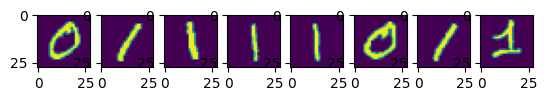

In [22]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(MNIST[i][0])

In [ ]:
28x28 Greyscale -> pixel (0-255) , 28x28=684

In [ ]:
import torch.nn.functional as F
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(28*28, 1)

    def forward(self, x):
        x = x.view((-1, 28*28)) #reshape
        x = F.sigmoid(self.fc(x))
        return x

net = Perceptron()


Manually Optimizing the Network

In [142]:
import numpy as np
BCE = torch.nn.BCELoss()
losses = []
for epoch in range(10):
    for x,t in trainloader:
        out = net(x) #y= sig(w^Tx+b)
        loss = BCE(out,t.unsqueeze(1).type(torch.FloatTensor))
        losses.append(loss.detach().numpy())
        net.zero_grad()
        loss.backward()
        #update parameters using SGD
        net.fc.bias=torch.nn.Parameter(net.fc.bias-net.fc.bias.grad*0.01)
        net.fc.weight=torch.nn.Parameter(net.fc.weight-net.fc.weight.grad*0.01)

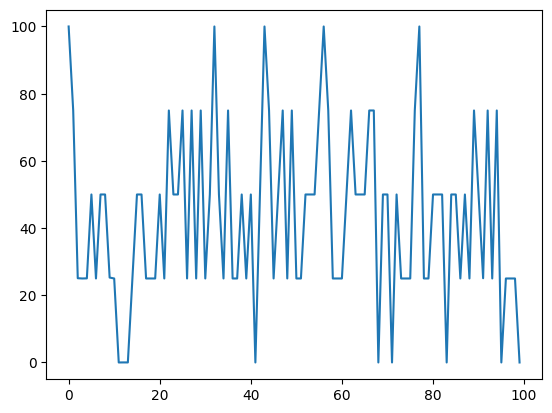

In [144]:
plt.plot(losses[-100:])

Using Optimizer Class

In [ ]:
import numpy as np
BCE = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
losses = []
for epoch in range(10):
    for x,t in trainloader:
        out = net(x)
        loss = BCE(out,t.unsqueeze(1).type(torch.FloatTensor))
        losses.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

Using a two-layer Network

In [166]:
import torch.nn.functional as F
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 400)
        self.fc2 = torch.nn.Linear(400, 1)

    def forward(self, x):
        x = x.view((-1, 28*28))
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

net = Net()

import numpy as np
BCE = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
losses = []
for epoch in range(10):
    for x,t in trainloader:
        out = net(x)
        loss = BCE(out,t.unsqueeze(1).type(torch.FloatTensor))
        losses.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


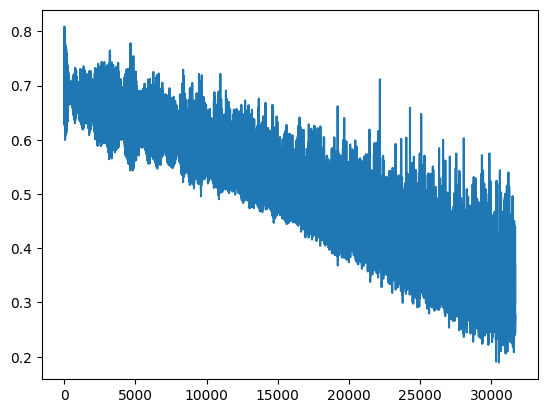

In [167]:
plt.plot(losses)

Test how well the model is performing

In [188]:
MNIST = torchvision.datasets.MNIST(root='.', download=True, train=False, transform=train_transforms)
MNIST= torch.utils.data.Subset(MNIST, torch.tensor([idx for idx, i in enumerate(MNIST.targets) if i<=1]))
testloader = torch.utils.data.DataLoader(MNIST, shuffle = True, batch_size=4)
acc = 0
count = 0
for x,t in testloader:
        out = net(x)
        acc+=torch.sum((out.squeeze()<0.5) == (t==0))
        count+= len(x)
print('Accuracy: ', acc/count)

Accuracy:  tensor(0.9939)
